Reference
- "Numerical Methods for Engineers" Steven C. Chapra, and Raymond P. Canale

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

### Problem 4.2
The Maclaurian series expansion for $\cos(x)$ is

$$
\cos(x) = 1-\frac{x^2}{2}+\frac{x^4}{4!}-\frac{x^6}{6!}+\frac{x^8}{8!}-...
$$

Starting with the simplest version, $\cos(x)=1$, add terms one at a time to estimate $\cos(\frac{\pi}{6})$. After each new term is added, compute the true and approximate percent relative errors. Use your pocket calculator to determine the true value.  Add terms until the absolute value of the approximate error estimate falls below an error criterion conforming to two significant figures.

### Answer

1. define functions

In [2]:
# for the specific function: cos(x)

def approximation_taylor_series(x, terms):
    """
    Calculates the approximation for f(x) using taylor series
      with certain number of terms
    
    x: x for the function
    terms: number of terms in the taylor series that will be used
    
    Returns: approximation
    """
    approx = 0
    for i in range(1, terms + 1):
        if i % 2 == 1:
            approx += (x ** ((i - 1) * 2)) / (math.factorial((i - 1) * 2))
        else:
            approx -= (x ** ((i - 1) * 2)) / (math.factorial((i - 1) * 2))
            
    return approx

# for the true value
TRUE = math.cos(math.pi / 6)

# for the approximation
def approximation_iterative(n):
    """
    Calculates the approximation based on the iterative steps.
    
    n: the number of iterative steps
    
    Returns: approximation
    """
    x = math.pi / 6
    return approximation_taylor_series(x, n)

In [3]:
# for general use

def true_percent_relative_error(true, approx):
    """
    Calculates the true percent relative error.
    
    true: true value
    approx: approximation
    
    Returns: true percent relative error (in percent)
    """
    if true == 0:
        return None
    epsilon_t = (true - approx) / true * 100 
    return epsilon_t

def approximate_percent_relative_error(cur_approx, prev_approx):
    """
    Calculates the approximate percent relative error.
      
    cur_approx: current approximation
    prev_approx: previous approximation
    
    Returns: approximate percent relative error (in percent)
    """
    if cur_approx == 0:
        return None
    
    epsilon_a = (cur_approx - prev_approx) / cur_approx * 100 
    return epsilon_a

def approximation_until_criterion(approx_iterative_func, sci_fig_nums, true):
    """
    Calculates the approximation using an iterative numerical method
      until meets the error criterion with certain number of significant figures
    
    approx_iterative_func: the function to calculate iterative approximation
    sci_fig_nums: number of significant figures for the error criterion
    true: true value
    
    Returns: dataframe contains approximation and error information
    """
    # 1. the error criterion (in percent)
    epsilon_s = (0.5 * (10 ** (2 - sci_fig_nums)))

    # 2. iterate until meet the error criterion
    df = pd.DataFrame(columns = ['Iter Step', 'Approx Value', 'Approx Relative Error(%)',
                                 'True Value', 'True Relative Error(%)'])
    i = 1
    prev_approx = None
    cur_approx = None
    while True:
        # approximation
        cur_approx = approx_iterative_func(i)
        # true percent relative error
        epsilon_t = true_percent_relative_error(true, cur_approx)
        # approximate percent relative error
        if prev_approx == None:
            epsilon_a = None
        else:
            epsilon_a = approximate_percent_relative_error(cur_approx, prev_approx)
        # store the information
        df.loc[len(df)] = [i, cur_approx, epsilon_a, true, epsilon_t]
        # check the error criterion
        if epsilon_a != None and abs(epsilon_a) <= epsilon_s:
            break
        # increment the order
        i += 1
        prev_approx = cur_approx

    # 3. plot the result
    plt.figure(figsize = (10, 8))
    plt.plot(df['Iter Step'], df['True Value'], 'bo--', label='True')
    plt.plot(df['Iter Step'], df['Approx Value'], 'go--', label='Approx')
    #plt.xlim(0, 20)
    plt.xticks(list(range(1, i + 1)))
    plt.title('Approximation until Error Criterion {}%'.format(epsilon_s))
    plt.xlabel('Iter Step')
    #plt.ylabel('Value')
    plt.legend(loc='lower right')
    plt.grid()
    
    # 4. return the result
    return df

,Iter Step,Approx Value,Approx Relative Error(%),True Value,True Relative Error(%)
0,1.0,1.000000,NaN,0.866025,-15.470054
1,2.0,0.862922,-15.885308,0.866025,0.358332
2,3.0,0.866054,0.361608,0.866025,-0.003289


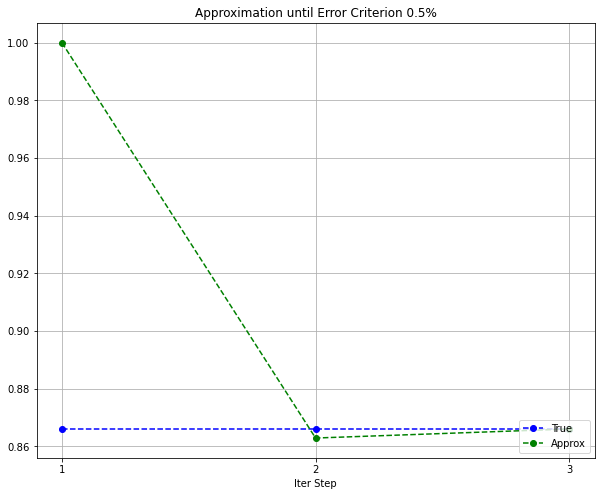

In [4]:
approximation_until_criterion(approximation_iterative, 2, TRUE)

### Problem 4.6
Use zero-through-fourth-order Taylor series expansions to predict $f(2.5)$ for $f(x)=ln(x)$ using a base point at $x=1$. Compute the true percent relative error $\epsilon_t$ for each approximation. Discuss the meaning of the results.


Using a base point at $x=1$
$$
ln(x)=\sum_{n=1}^{\infty}(-1)^{n-1}\frac{(x-1)^n}{n}
$$

### Answer

1. define functions

In [5]:
# for the true value
TRUE = np.log(2.5)

# for the approximation
def ln_approx(x, order):
    
    if order == 0:
        return 0

    approx = 0
    for i in range(1, order+1):
        approx = approx + ((-1)**(i-1)) * ((x-1)**i) / i
            
    return approx

def approximation_iterative(n):
    """
    Calculates the approximation based on the iterative steps.
    
    n: the number of iterative steps
    
    Returns: approximation
    """
    x = 2.5
    order = n - 1 # first step with order 0
    return ln_approx(x, order)

In [8]:
# for general use

def approximation_certain_steps(approx_iterative_func, steps, true):
    """
    Calculates the approximation using an iterative numerical method
      with certain number of steps
      
    approx_iterative_func: the function to calculate iterative approximation
    steps: number of steps
    true: true value
    
    Returns: dataframe contains approximation and error information
    """

    # 1. iterate with certain nubmer of steps
    df = pd.DataFrame(columns = ['Iter Step', 'Approx Value', 'Approx Relative Error(%)',
                                 'True Value', 'True Relative Error(%)'])

    prev_approx = None
    cur_approx = None
    for i in range(1, steps+1):
        # approximation
        cur_approx = approx_iterative_func(i)
        # true percent relative error
        epsilon_t = true_percent_relative_error(true, cur_approx)
        # approximate percent relative error
        if prev_approx == None:
            epsilon_a = None
        else:
            epsilon_a = approximate_percent_relative_error(cur_approx, prev_approx)
        # store the information
        df.loc[len(df)] = [i, cur_approx, epsilon_a, true, epsilon_t]
        prev_approx = cur_approx

    # 2. plot the result
    plt.figure(figsize = (10, 8))
    plt.plot(df['Iter Step'], df['True Value'], 'bo--', label='True')
    plt.plot(df['Iter Step'], df['Approx Value'], 'go--', label='Approx')
    #plt.xlim(0, 20)
    plt.xticks(list(range(1, i + 1)))
    plt.title('Approximation with {} Steps'.format(steps))
    plt.xlabel('Iter Step')
    #plt.ylabel('Value')
    plt.legend(loc='lower right')
    plt.grid()
    
    # 3. return the result
    return df

2. implement calculations

,Iter Step,Approx Value,Approx Relative Error(%),True Value,True Relative Error(%)
0,1.0,0.000000,NaN,0.916291,100.000000
1,2.0,1.500000,100.0,0.916291,-63.703500
2,3.0,0.375000,-300.0,0.916291,59.074125
3,4.0,1.500000,75.0,0.916291,-63.703500
4,5.0,0.234375,-540.0,0.916291,74.421328


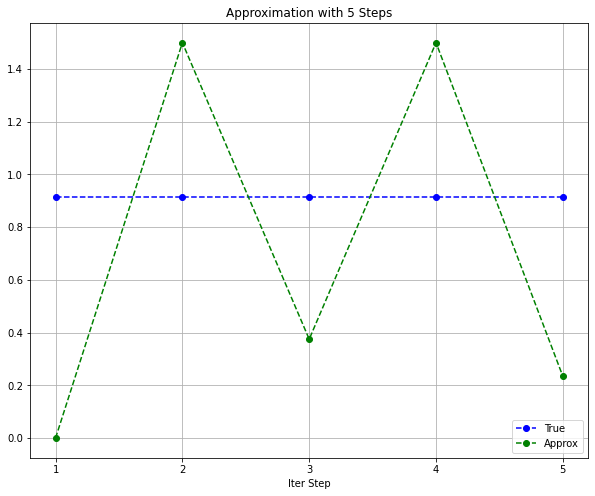

In [9]:
approximation_certain_steps(approximation_iterative, 5, TRUE)

The approximations don't converge, which makes the result not a good approximation. Based on the below analysis, increasing the order to 14 doesn't help, but lower the difference to 0.5 (ln(1.5) make a better approximation

,Iter Step,Approx Value,Approx Relative Error(%),True Value,True Relative Error(%)
0,1.0,0.000000,NaN,0.916291,100.000000
1,2.0,1.500000,100.000000,0.916291,-63.703500
2,3.0,0.375000,-300.000000,0.916291,59.074125
3,4.0,1.500000,75.000000,0.916291,-63.703500
4,5.0,0.234375,-540.000000,0.916291,74.421328
5,6.0,1.753125,86.631016,0.916291,-91.328466
6,7.0,-0.145312,1306.451613,0.916291,115.858777
7,8.0,2.295536,106.330222,0.916291,-150.524821
8,9.0,-0.908078,352.790708,0.916291,199.103651
9,10.0,3.363407,126.998743,0.916291,-267.067645


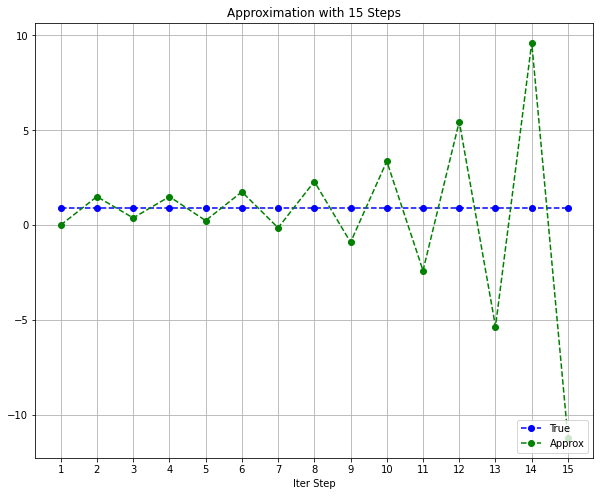

In [10]:
approximation_certain_steps(approximation_iterative, 15, TRUE)

,Iter Step,Approx Value,Approx Relative Error(%),True Value,True Relative Error(%)
0,1.0,0.000000,NaN,0.405465,100.000000
1,2.0,0.500000,100.000000,0.405465,-23.315173
2,3.0,0.375000,-33.333333,0.405465,7.513620
3,4.0,0.416667,10.000000,0.405465,-2.762644
4,5.0,0.401042,-3.896104,0.405465,1.090955


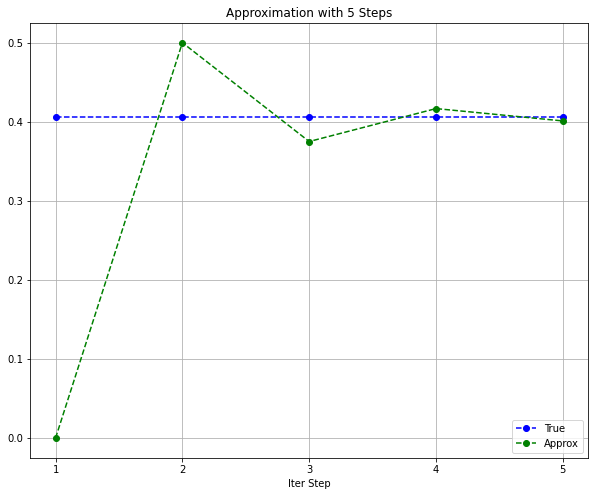

In [11]:
# for the true value
TRUE = np.log(1.5)

# for the approximation
def ln_approx(x, order):
    
    if order == 0:
        return 0

    approx = 0
    for i in range(1, order+1):
        approx = approx + ((-1)**(i-1)) * ((x-1)**i) / i
            
    return approx

def approximation_iterative(n):
    """
    Calculates the approximation based on the iterative steps.
    
    n: the number of iterative steps
    
    Returns: approximation
    """
    x = 1.5
    order = n - 1 # first step with order 0
    return ln_approx(x, order)

approximation_certain_steps(approximation_iterative, 5, TRUE)